In [138]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [139]:
df = pd.read_csv("SBER Historical Data.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,09/26/2023,256.02,252.13,257.17,250.90,34.71M,1.33%
1,09/25/2023,252.65,252.00,253.49,249.83,31.86M,0.26%
2,09/22/2023,251.99,249.85,253.10,248.62,40.71M,0.73%
3,09/21/2023,250.16,252.87,254.20,249.81,58.91M,-1.42%
4,09/20/2023,253.77,252.80,255.47,249.82,66.83M,0.42%


In [140]:
df.shape

(3424, 7)

In [141]:
df.isnull().values.any()

False

In [142]:
df = df.rename(columns={"Change %" : "Change", "Vol." : "Vol"})

In [143]:
df.dtypes

Date       object
Price     float64
Open      float64
High      float64
Low       float64
Vol        object
Change     object
dtype: object

In [144]:
def vol_converter(x):
    if 'M' in x:
        return (float(x.strip('M'))*1000000)
    elif 'B' in x:
        return (float(x.strip('B'))*1000000000)
    

df["Vol"] = df["Vol"].map(vol_converter)
df["Change"] = df["Change"].map(lambda x: float(x.strip('%'))*0.01)


In [145]:
df.dtypes

Date       object
Price     float64
Open      float64
High      float64
Low       float64
Vol       float64
Change    float64
dtype: object

In [146]:
df.describe()

,Price,Open,High,Low,Vol,Change
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3424.000000
mean,155.194582,155.207693,157.092956,153.150926,1.005128e+08,0.000571
std,75.041959,75.067396,75.779321,74.219382,8.229731e+07,0.022072
min,53.500000,53.040000,55.450000,47.210000,6.510000e+06,-0.366100
25%,92.030000,92.200000,92.927500,91.120000,4.709000e+07,-0.009825
50%,131.475000,131.565000,133.495000,128.770000,7.557500e+07,0.000300
75%,219.012500,218.627500,222.135000,216.440000,1.265050e+08,0.011700
max,387.600000,385.880000,388.110000,376.720000,1.080000e+09,0.129000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3424 non-null   object 
 1   Price   3424 non-null   float64
 2   Open    3424 non-null   float64
 3   High    3424 non-null   float64
 4   Low     3424 non-null   float64
 5   Vol     3424 non-null   float64
 6   Change  3424 non-null   float64
dtypes: float64(6), object(1)
memory usage: 187.4+ KB


In [148]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

print(pd.date_range(start = '2010-01-27', end = '2023-09-26' ).difference(df.index))

df.loc[df.index.strftime('%Y-%m-%d') == '2010-02-06']

DatetimeIndex(['2010-01-30', '2010-01-31', '2010-02-06', '2010-02-07',
               '2010-02-13', '2010-02-14', '2010-02-20', '2010-02-21',
               '2010-02-22', '2010-02-23',
               ...
               '2023-08-26', '2023-08-27', '2023-09-02', '2023-09-03',
               '2023-09-09', '2023-09-10', '2023-09-16', '2023-09-17',
               '2023-09-23', '2023-09-24'],
              dtype='datetime64[ns]', length=1567, freq=None)


,Price,Open,High,Low,Vol,Change
Date,,,,,,


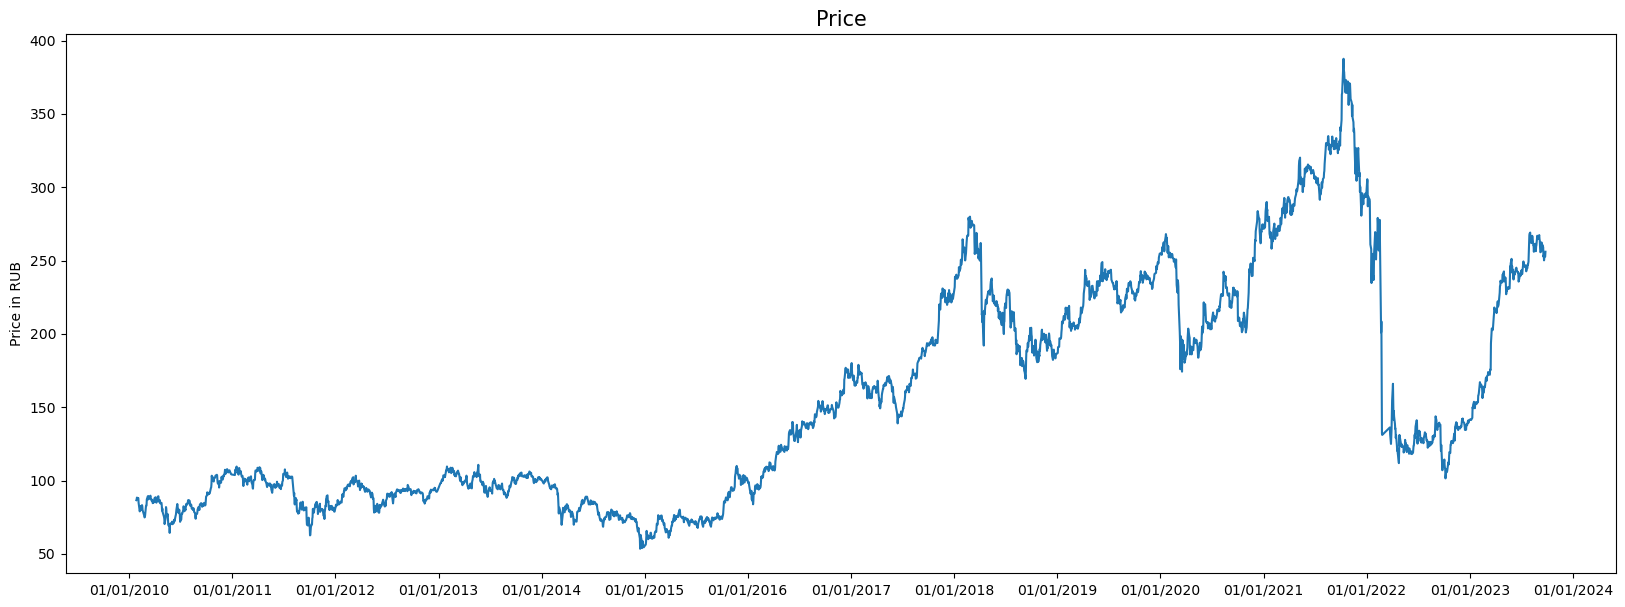

In [149]:
import datetime as dt
import matplotlib.dates as mdates

dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df.index.astype(str)]

plt.figure(figsize=(20,7))
plt.plot(dates, df["Price"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('Price', fontsize=15)
plt.ylabel('Price in RUB')
plt.show()

In [150]:
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
complete_df = pd.DataFrame(index=date_range)
df = complete_df.join(df)
df.interpolate(method="linear", axis=0, inplace=True)


print(pd.date_range(start = '2010-01-27', end = '2023-09-26' ).difference(df.index))
df.loc[df.index.strftime('%Y-%m-%d') == '2010-02-06']

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


,Price,Open,High,Low,Vol,Change
2010-02-06,81.73,83.133333,84.143333,80.263333,267300000.0,-0.029567


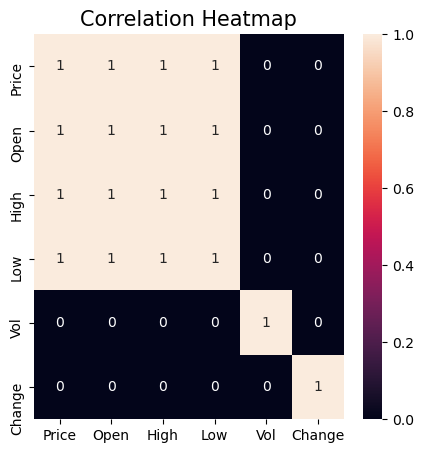

,Price,Open,High,Low,Vol,Change
Price,1.000000,0.999109,0.999267,0.999530,-0.441780,0.019471
Open,0.999109,1.000000,0.999369,0.999206,-0.438190,-0.015066
High,0.999267,0.999369,1.000000,0.998573,-0.427254,-0.001771
Low,0.999530,0.999206,0.998573,1.000000,-0.454025,0.009275
Vol,-0.441780,-0.438190,-0.427254,-0.454025,1.000000,-0.069236
Change,0.019471,-0.015066,-0.001771,0.009275,-0.069236,1.000000


In [151]:
plt.figure(figsize=(5,5))

sb.heatmap(df.corr()> 0.9, annot=True)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

df.corr()


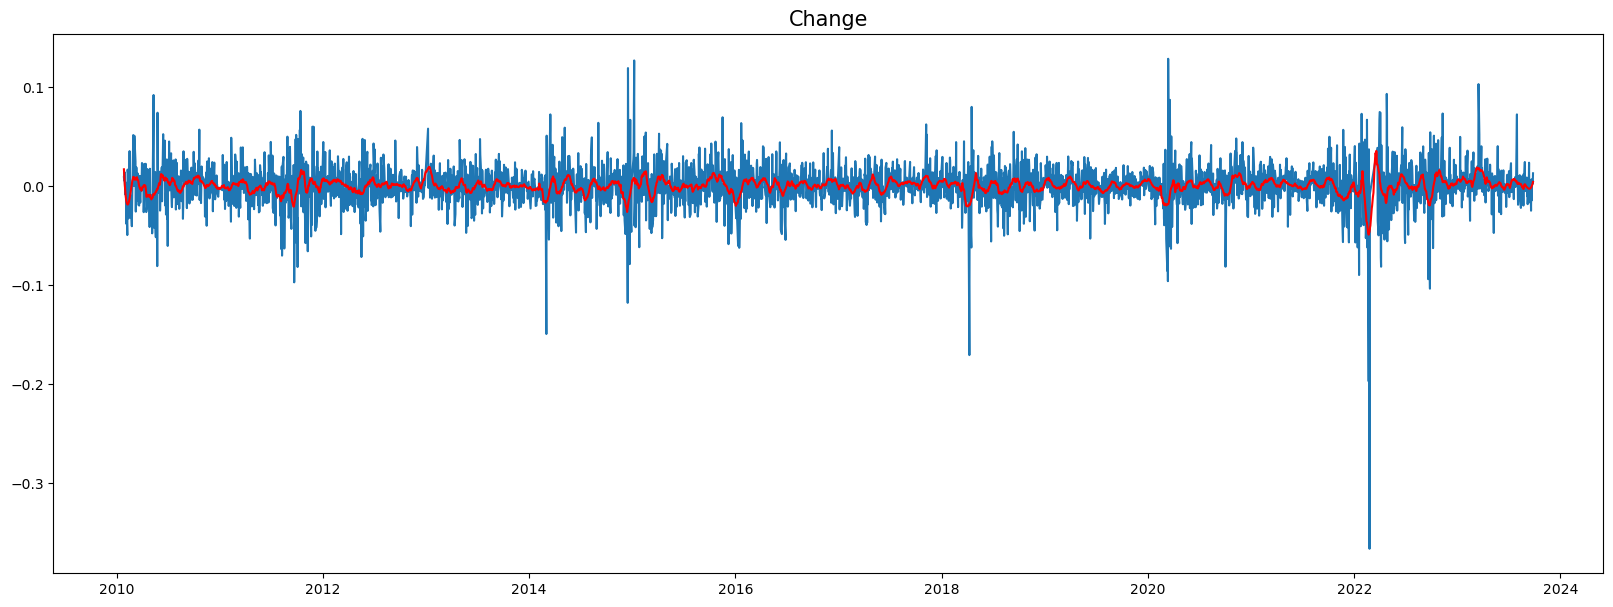

In [152]:
from scipy.signal import savgol_filter

dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df.index.astype(str)]

plt.figure(figsize=(20,7))
plt.plot(dates, df["Change"])

change_smoothed = savgol_filter(df["Change"], 51, 3)
plt.plot(dates, change_smoothed, color='red')

plt.title('Change', fontsize=15)
plt.show()

In [153]:
df_by_change = df.sort_values(by=['Change'])

df_by_change.head(20)

,Price,Open,High,Low,Vol,Change
2022-02-24,132.180000,187.540000,187.540000,89.590000,8.293600e+08,-0.366100
2022-02-21,201.000000,249.150000,258.320000,184.300000,1.080000e+09,-0.196900
2018-04-09,213.000000,255.050000,255.300000,205.000000,2.500200e+08,-0.170400
2022-02-23,170.355000,193.130000,203.720000,135.810000,8.876900e+08,-0.164300
2014-03-03,77.570000,85.500000,86.840000,74.960000,4.279100e+08,-0.149100
2022-02-20,217.426667,253.476667,261.213333,204.533333,8.101967e+08,-0.144433
2018-04-08,227.586667,256.913333,257.640000,222.003333,1.801000e+08,-0.120267
2014-12-16,53.500000,59.500000,61.950000,47.210000,4.707500e+08,-0.117600
2022-09-26,107.060000,114.000000,117.990000,105.000000,1.486400e+08,-0.103300
2011-09-22,73.800000,79.820000,79.900000,73.760000,3.830800e+08,-0.096900


In [154]:
df_by_change.tail(20)

,Price,Open,High,Low,Vol,Change
2023-07-31,267.400000,251.330000,267.770000,251.330000,167910000.0,0.072800
2022-01-27,254.290000,235.000000,260.000000,233.100000,301310000.0,0.073400
2022-11-10,136.680000,131.000000,136.690000,129.770000,171750000.0,0.073700
2022-04-04,166.000000,158.760000,166.880000,150.200000,115940000.0,0.074400
2010-05-26,69.120000,66.190000,69.390000,65.600000,517830000.0,0.074500
2022-04-03,162.166667,154.173333,163.053333,148.303333,116920000.0,0.074667
2022-04-02,158.333333,149.586667,159.226667,146.406667,117900000.0,0.074933
2022-04-01,154.500000,145.000000,155.400000,144.510000,118880000.0,0.075200
2011-10-14,80.720000,75.740000,80.880000,74.160000,619490000.0,0.076300
2018-04-17,207.500000,203.020000,207.870000,200.000000,169900000.0,0.080400


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

print(df.head())

price_seasonal_analysis = seasonal_decompose(df["Price"], model="additive")
volume_seasonal_analysis = seasonal_decompose(df["Vol"], model="additive")
change_seasonal_analysis = seasonal_decompose(df["Change"], model="additive")

price_trend = price_seasonal_analysis.trend
seasonal = price_seasonal_analysis.seasonal
residual = price_seasonal_analysis.resid


price_seasonal_analysis.plot()



             Price    Open    High     Low         Vol  Change
Date                                                          
2023-09-26  256.02  252.13  257.17  250.90  34710000.0  0.0133
2023-09-25  252.65  252.00  253.49  249.83  31860000.0  0.0026
2023-09-22  251.99  249.85  253.10  248.62  40710000.0  0.0073
2023-09-21  250.16  252.87  254.20  249.81  58910000.0 -0.0142
2023-09-20  253.77  252.80  255.47  249.82  66830000.0  0.0042


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None